In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df_index.drop(columns=["Unnamed: 0", "month", "year"], axis=1, inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

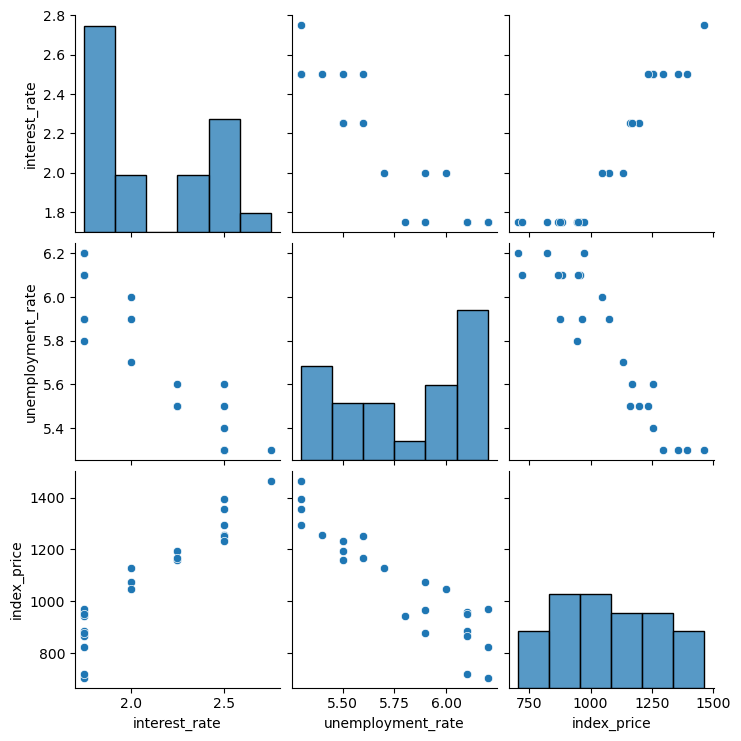

In [8]:
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


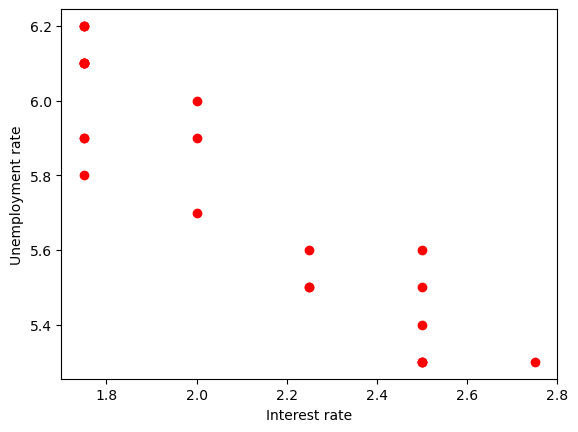

In [13]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")
plt.show()

In [14]:
X = df_index.iloc[:,:-1]
y = df_index.iloc[:, -1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [16]:
import seaborn as sns


In [18]:
sns.regplot(df_index['interest_rate'], df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='interest_rate', ylabel='index_price'>

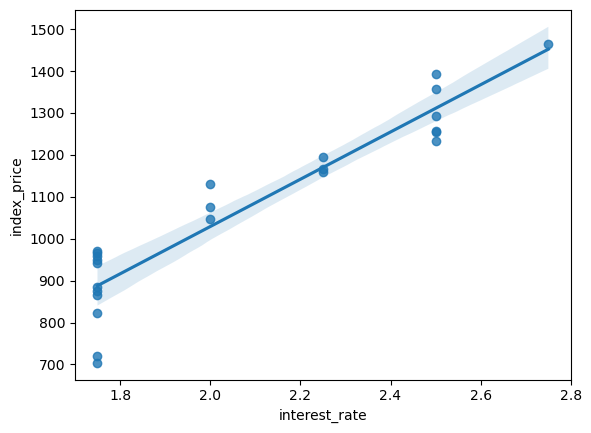

In [19]:
sns.regplot(data=df_index, x="interest_rate", y="index_price")

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

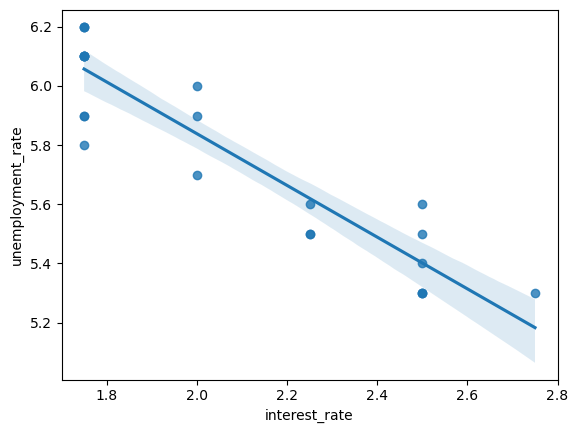

In [20]:
sns.regplot(data=df_index, x="interest_rate", y="unemployment_rate")

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

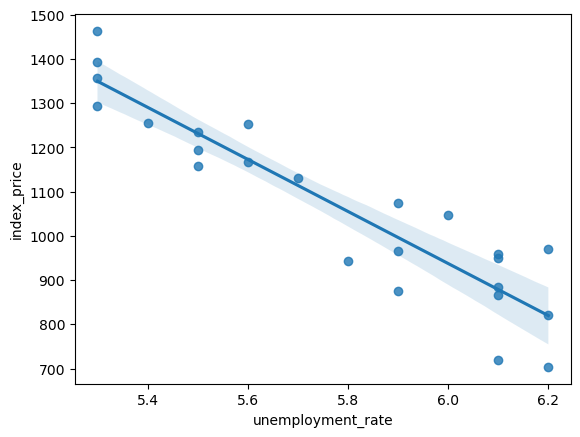

In [21]:
sns.regplot(data=df_index, x="unemployment_rate", y="index_price")

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',
                                  cv=3)

In [31]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [32]:
np.mean(validation_score)

-5914.828180162386

In [33]:
y_pred = regression.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

73.80444932337097
8108.567426306604
90.04758423359621


In [36]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [38]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

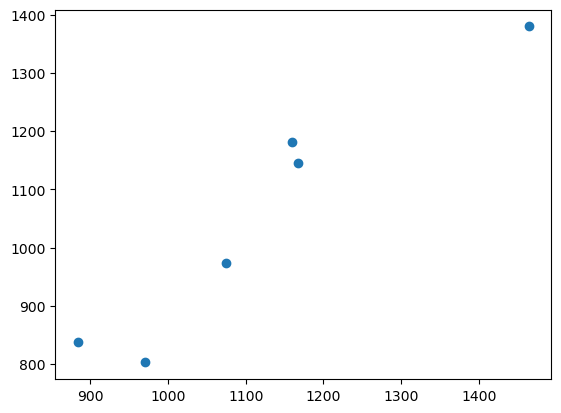

In [39]:
plt.scatter(y_test, y_pred)

In [40]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


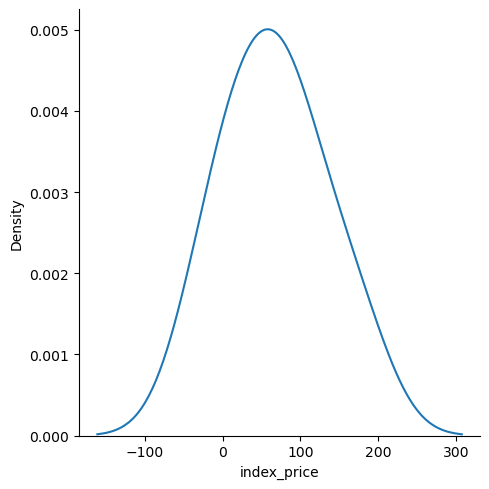

In [41]:
sns.displot(residuals, kind='kde')

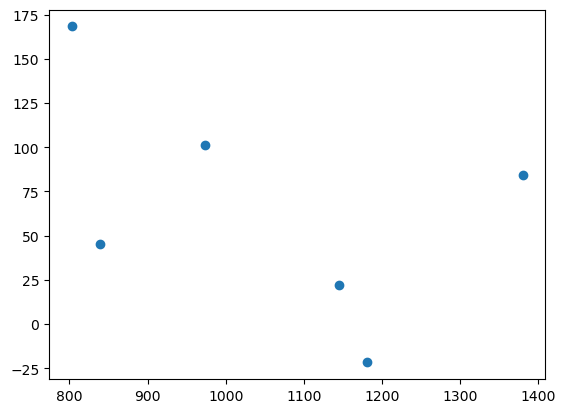

In [42]:
plt.scatter(y_pred, residuals)

In [43]:
import statsmodels.api as sm

In [44]:
model = sm.OLS(y_train, X_train).fit()

In [46]:
model.summary()

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 25 Oct 2024   Prob (F-statistic):                       0.754
Time:                        18:25:49   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(regression.coef_)

[  88.27275507 -116.25716066]
